In [44]:
import nba_api
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nba_api.stats.endpoints import franchisehistory
from scipy import stats
from nba_api.stats.endpoints import leaguedashplayerstats
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
import time
from requests.exceptions import ReadTimeout, ConnectionError
import seaborn as sns


In [12]:
close_game = pd.read_csv("../data/CloseGameWinPct.csv")
game = pd.read_csv("../data/WinPercentage.csv")

In [13]:
win = pd.merge(close_game, game, how = "inner", on = "Team")

                 CloseGameWinPct   WinPct
CloseGameWinPct          1.00000  0.57977
WinPct                   0.57977  1.00000


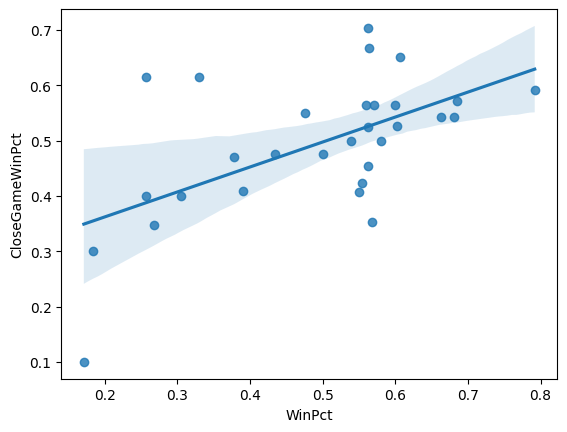

In [15]:
sns.regplot(x = win["WinPct"], y = win["CloseGameWinPct"])
print(win.corr(numeric_only=True))

In [ ]:
boxscore= pd.read_csv("../data/BoxScoreData.csv")
boxscore[boxscore["+/-"].isna()]

,Unnamed: 0,Game_ID,Player_Name,Player_ID,Starter,Home,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
25432,19,1244,Gustavo Ayón,ayongu01,False,False,0:00,0,0,NaN,...,0,0,0,0,0,0,0,0,0.0,NaN
30891,10,11088,Tacko Fall,fallta01,False,True,0:00,0,0,NaN,...,0,0,0,0,0,0,0,0,0.0,NaN
30902,21,11088,Tacko Fall,fallta01,False,False,0:00,0,0,NaN,...,0,0,0,0,0,0,0,0,0.0,NaN
36614,11,11661,Jock Landale,landajo01,False,True,0:17,0,0,NaN,...,0,0,0,0,0,0,0,0,0.0,NaN
36626,23,11661,Jock Landale,landajo01,False,False,0:17,0,0,NaN,...,0,0,0,0,0,0,0,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62294,19,14385,Jay Huff,huffja01,False,False,0:00,0,0,NaN,...,0,0,0,0,0,0,0,0,0.0,NaN
68742,9,15089,Jontay Porter,portejo01,False,True,0:00,0,0,NaN,...,0,0,0,0,0,0,0,0,0.0,NaN
68752,19,15089,Jontay Porter,portejo01,False,False,0:00,0,0,NaN,...,0,0,0,0,0,0,0,0,0.0,NaN
74776,9,13647,Taj Gibson,gibsota01,False,True,0:00,0,0,NaN,...,0,0,0,0,0,0,0,0,0.0,NaN


In [20]:
boxscore.corr(numeric_only=True)

,Unnamed: 0,Game_ID,Starter,Home,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
Unnamed: 0,1.000000,-0.050422,-0.437483,-0.845676,-0.346344,-0.373853,-0.068411,-0.193831,-0.236510,-0.038807,...,-0.267072,-0.260161,-0.269353,-0.164210,-0.113208,-0.223972,-0.166585,-0.353719,-0.332477,-0.077964
Game_ID,-0.050422,1.000000,0.029427,-0.000536,0.107292,0.093787,0.062771,0.210481,0.268449,0.029729,...,0.074632,0.054509,0.096872,0.009307,-0.000958,-0.003890,0.051547,0.123671,0.135432,-0.008820
Starter,-0.437483,0.029427,1.000000,-0.000193,0.503524,0.553007,0.076402,0.239200,0.307255,0.024850,...,0.412365,0.408568,0.389682,0.237332,0.187986,0.363828,0.282446,0.506592,0.466187,0.016526
Home,-0.845676,-0.000536,-0.000193,1.000000,0.004420,-0.000447,0.009369,0.001532,-0.001106,0.003779,...,0.005418,0.005308,0.008424,0.001688,0.008615,-0.005321,-0.010268,0.005432,0.012547,0.051845
FG,-0.346344,0.107292,0.503524,0.004420,1.000000,0.892619,0.416292,0.530846,0.504600,0.263434,...,0.450644,0.445485,0.444845,0.268546,0.157930,0.413973,0.260513,0.965576,0.894900,0.176217
FGA,-0.373853,0.093787,0.553007,-0.000447,0.892619,1.000000,0.083170,0.514033,0.644057,0.069579,...,0.443783,0.432501,0.511452,0.295293,0.127835,0.451764,0.253629,0.892223,0.740803,0.097664
FG%,-0.068411,0.062771,0.076402,0.009369,0.416292,0.083170,1.000000,0.175528,-0.056900,0.582227,...,0.148902,0.163979,0.029366,0.045204,0.109336,0.063900,0.120782,0.362408,0.462251,0.180405
3P,-0.193831,0.210481,0.239200,0.001532,0.530846,0.514033,0.175528,1.000000,0.827968,0.599906,...,0.116679,0.047094,0.269199,0.148793,-0.034091,0.197362,0.105093,0.607386,0.530564,0.136854
3PA,-0.236510,0.268449,0.307255,-0.001106,0.504600,0.644057,-0.056900,0.827968,1.000000,0.149763,...,0.144970,0.062757,0.350486,0.189016,-0.045310,0.243536,0.116386,0.575661,0.431863,0.066868
3P%,-0.038807,0.029729,0.024850,0.003779,0.263434,0.069579,0.582227,0.599906,0.149763,1.000000,...,0.028219,0.013831,0.027729,0.015860,0.007232,0.037413,0.048833,0.299342,0.345445,0.152511


In [35]:
boxscore.mean(numeric_only=True)

Unnamed: 0       9.699876
Game_ID       8771.622101
Starter          0.495735
Home             0.500137
FG               3.943127
FGA              8.554014
FG%              0.447928
3P               1.039057
3PA              2.899668
3P%              0.328262
FT               1.732982
FTA              2.246454
FT%              0.757597
ORB              1.061236
DRB              3.233848
TRB              4.295084
AST              2.342098
STL              0.748662
BLK              0.487257
TOV              1.330077
PF               1.988084
PTS             10.658293
GmSc             8.359263
+/-             -0.135204
dtype: float64

In [36]:
boxscore.median(numeric_only=True)

Unnamed: 0       10.000
Game_ID       11751.000
Starter           0.000
Home              1.000
FG                3.000
FGA               7.000
FG%               0.455
3P                0.000
3PA               2.000
3P%               0.333
FT                1.000
FTA               2.000
FT%               0.833
ORB               1.000
DRB               3.000
TRB               4.000
AST               2.000
STL               0.000
BLK               0.000
TOV               1.000
PF                2.000
PTS               9.000
GmSc              6.900
+/-               0.000
dtype: float64

In [39]:
boxscore.var(numeric_only=True).sort_values()

FG%           5.410145e-02
FT%           8.047546e-02
3P%           8.552596e-02
Starter       2.499851e-01
Home          2.500032e-01
BLK           7.374424e-01
STL           9.465569e-01
TOV           2.000693e+00
ORB           2.001538e+00
3P            2.002290e+00
PF            2.219031e+00
FT            5.640528e+00
AST           6.815922e+00
DRB           7.518559e+00
FTA           8.265213e+00
3PA           8.878035e+00
FG            1.058266e+01
TRB           1.240079e+01
Unnamed: 0    3.624660e+01
FGA           3.715076e+01
GmSc          5.858986e+01
PTS           7.632809e+01
+/-           9.135317e+01
Game_ID       3.554984e+07
dtype: float64

In [40]:
boxscore.skew(numeric_only=True).sort_values()

FT%          -1.113000
Game_ID      -0.568871
Home         -0.000547
Starter       0.017062
FG%           0.088522
Unnamed: 0    0.124706
+/-           0.126014
PF            0.492154
3P%           0.621688
FGA           0.846890
GmSc          0.937050
FG            0.988638
PTS           1.026565
3PA           1.164656
DRB           1.251560
TRB           1.264673
TOV           1.321512
STL           1.553112
3P            1.658817
AST           1.695599
FTA           1.832476
ORB           1.919583
FT            1.968832
BLK           2.450765
dtype: float64

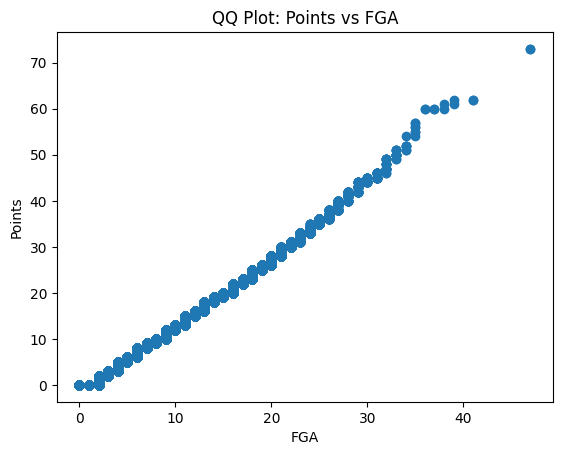

In [47]:
#QQ PLOTS
#First points vs FGA

x = boxscore["FGA"]
y = boxscore["PTS"]

x = np.sort(x)
y = np.sort(y)
plt.scatter(x, y)
plt.title("QQ Plot: Points vs FGA")
plt.xlabel("FGA")
plt.ylabel("Points")
plt.show()

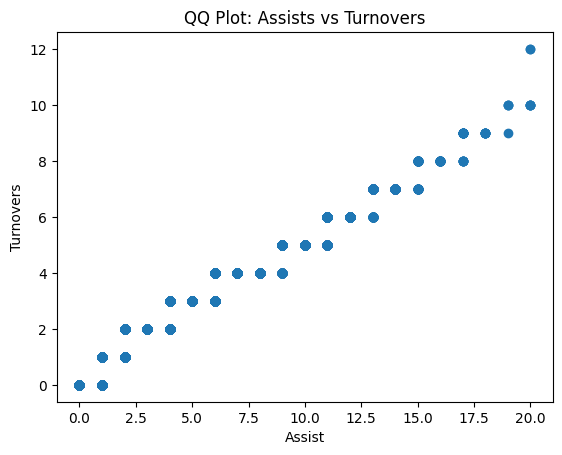

In [48]:
#Second assists vs turnovers

x = boxscore["AST"]
y = boxscore["TOV"]

x = np.sort(x)
y = np.sort(y)
plt.scatter(x, y)
plt.title("QQ Plot: Assists vs Turnovers")
plt.xlabel("Assist")
plt.ylabel("Turnovers")
plt.show()


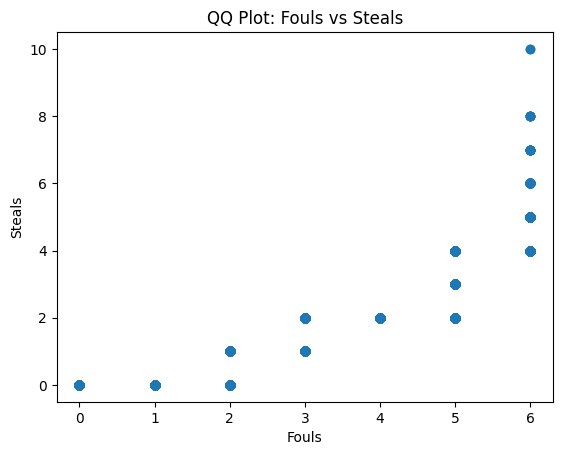

In [49]:
#Third personal fouls vs steals

x = boxscore["PF"]
y = boxscore["STL"]

x = np.sort(x)
y = np.sort(y)
plt.scatter(x, y)
plt.title("QQ Plot: Fouls vs Steals")
plt.xlabel("Fouls")
plt.ylabel("Steals")
plt.show()

In [ ]:
#PLAY BY PLAY

#replacing 1 with 1st quarter
pbp = pd.read_csv("../data/PBPData.csv")
pbp['quarter'] = pbp['quarter'].replace({'1': '1st quarter'})

In [ ]:
#pbp.to_csv("../data/PBPData2.csv", index=False)

In [59]:
pbp.dtypes

game_id                 int64
time                   object
quarter                object
player_id              object
play_type              object
secondary_player_id    object
away score              int64
home score              int64
rebound                object
shot_type              object
distance               object
shot_score             object
dtype: object